In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
# Load the dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
# Create DataFrame
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# checking if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Display Data information
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns=['target'])
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33,random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(381, 188, 381, 188)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# standardizing the feature variables
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
scaled_X_train.std()

1.0

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [15]:
# make predictions
y_pred = model.predict(scaled_X_test)
y_test, y_pred

(204    1
 70     0
 131    0
 431    1
 540    1
       ..
 141    0
 498    0
 7      0
 541    1
 19     1
 Name: target, Length: 188, dtype: int32,
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]))

In [16]:
model.coef_

array([[-0.36490261, -0.37756212, -0.34579993, -0.40748458, -0.0810045 ,
         0.63375187, -0.79653914, -1.09184519,  0.16039288,  0.12542171,
        -1.17844138,  0.2199221 , -0.71445673, -0.81092067, -0.20748929,
         0.53921952,  0.04223211, -0.43469067,  0.49958566,  0.59015078,
        -0.76232869, -1.28322361, -0.56684446, -0.70808054, -0.53130743,
         0.09663363, -0.97648481, -0.76148895, -1.16668117, -0.11772719]])

['maligant':0 (cancerous), 'benign': 1 (noncancerous)]
As mean radius increases, the log-odds of a positive test result(class 1) decreases. That means the higher mean radius of the tumor implies lower chance of tumor being noncancerous. 

As mean compactness increases, the log odd of a positive test result(noncancerous) increases. This implies that higher mean compactness mean higher chance of tumor being noncancerous.

In [19]:
odds_ratio = np.exp(-0.36490261)
odds_ratio

0.6942642619820771

This means that for every one unit increase in mean radius of the tumor,the odds of a positive test result(class 1, noncancerous) decreases by about (1-0.70 = 0.30) or 30%

In [21]:
odds_ratio = np.exp(0.63375187)
odds_ratio

1.8846683617304305

In [22]:
odds_ratio = np.exp(-1.17844138)
odds_ratio

0.30775804281822816

In [23]:
odds_ratio = np.exp(0.53921952)
odds_ratio

1.7146680756650718

In [24]:
odds_ratio = np.exp(-0.76232869)
odds_ratio

0.4665786439243611

In [25]:
odds_ratio = np.exp(0.09663363)
odds_ratio

1.1014567589765905

In [26]:
odds_ratio = np.exp(-0.37756212)
odds_ratio

0.6855306150997608

In [27]:
odds_ratio = np.exp(-0.79653914)
odds_ratio

0.45088672279347813

In [28]:
odds_ratio = np.exp(0.2199221)
odds_ratio

1.2459796649908221

In [29]:
odds_ratio = np.exp(0.04223211)
odds_ratio

1.043136573083397

In [30]:
odds_ratio = np.exp(-1.28322361)
odds_ratio

0.2771424597147633

In [31]:
odds_ratio = np.exp(--0.97648481)
odds_ratio

2.655106614478244

In [32]:
odds_ratio = np.exp(-0.34579993)
odds_ratio

0.7076540532908981

In [33]:
odds_ratio = np.exp(-1.09184519)
odds_ratio

0.33559668240537555

In [34]:
odds_ratio = np.exp(-0.71445673)
odds_ratio

0.4894579473986227

In [35]:
odds_ratio = np.exp(-0.43469067)
odds_ratio

0.6474649164274707

In [36]:
odds_ratio = np.exp(-0.56684446)
odds_ratio

0.5673127953970242

In [37]:
odds_ratio = np.exp(-0.76148895)
odds_ratio

0.4669706132279281

In [38]:
odds_ratio = np.exp( -0.40748458)
odds_ratio

0.665321710579707

In [39]:
odds_ratio = np.exp(0.16039288)
odds_ratio

1.1739720105231235

In [40]:
odds_ratio = np.exp(-0.81092067)
odds_ratio

0.44444868722750847

In [41]:
odds_ratio = np.exp(0.49958566)
odds_ratio

1.6480382810335665

In [42]:
odds_ratio = np.exp(-0.70808054)
odds_ratio

0.4925887951008993

In [43]:
odds_ratio = np.exp(-1.16668117)
odds_ratio

0.31139870756259136

In [44]:
odds_ratio = np.exp(-0.0810045)
odds_ratio

0.9221895415823338

In [45]:
odds_ratio = np.exp(0.12542171)
odds_ratio

1.1336264138743117

In [46]:
odds_ratio = np.exp(-0.20748929)
odds_ratio

0.8126219449075223

In [47]:
odds_ratio = np.exp(0.59015078)
odds_ratio

1.8042604412786465

In [48]:
odds_ratio = np.exp(-0.53130743)
odds_ratio

0.5878359127364579

In [49]:
odds_ratio = np.exp(-0.11772719)
odds_ratio

0.8889385308584722

This means that for every one unit increases in mean radius of the tumor, the odd of a positive test result (class 1, noncancerous) decreases by 1.89 times

In [51]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, confusion_matrix, classification_report

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9787234042553191

An accuracy score of 97.8% implies that approx. 98% of data points have been correctly classified by our model which is good score

In [54]:
precision = precision_score(y_test, y_pred)
precision

0.9915966386554622

A precision score of 99% implies that out total positives predicted by our model, 99% of them are correctly classified

In [56]:
recall = recall_score(y_test, y_pred)
recall

0.9752066115702479

A recall score of 97.5% indicates that out of total positives in our test data, 97.5% were correctly classified

In [58]:
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[ 66,   1],
       [  3, 118]], dtype=int64)

In [59]:
(66+118)/(66+118+1+3)

0.9787234042553191

In [60]:
118/119

0.9915966386554622

In [61]:
118/(3+118)

0.9752066115702479

In [62]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



1. 98% Accuracy score implies that 98% of the data points were correclty classified
2. Negative class(0)
  - precision score (96%): 96% of the predicted negatives were correctly classified.
  - recall score (99%): 99% of the actual negatives were correcity specified.
  - f1 score (97%): recall and precision are fairly balanced.
3. Positive class (1)
  - precision score (99%): 99% of the predicted positives were correctly classified.
  - recall score(98%): 98% of the actual positives were correclty specified.
  - f1 score (98%): recall and precision are fairly balanced.

In [64]:
pre_0 = 66/(66 + 3)
pre_0

0.9565217391304348

In [65]:
rec_0 = 66/67
rec_0

0.9850746268656716

In [66]:
1/67, 118/121

(0.014925373134328358, 0.9752066115702479)

In [67]:
from sklearn.metrics import roc_curve

<function matplotlib.pyplot.show(close=None, block=None)>

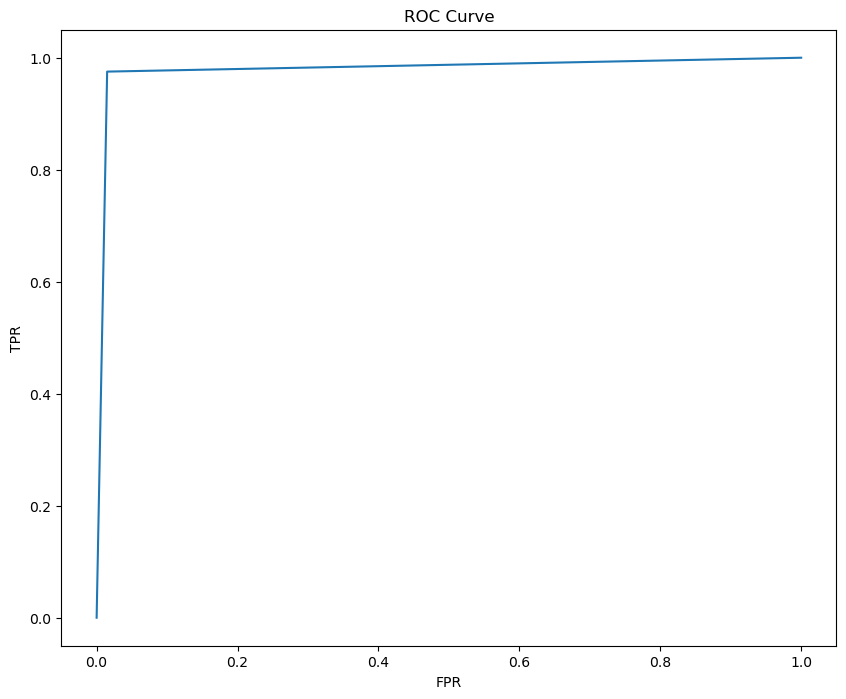

In [68]:
fpr,tpr,_ = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show